## **Step-by-Step Guide for Language Detection**

### **Step 1: Understanding Language Detection**

Language detection involves identifying the language in which a given piece of text is written. This can be done using various techniques, and one effective method is using character n-grams.

### **Step 2: Character n-grams**

Character n-grams are contiguous sequences of 'n' characters from a given text. For example, for the word "language":
- Unigrams (1-grams): 'l', 'a', 'n', 'g', 'u', 'a', 'g', 'e'
- Bigrams (2-grams): 'la', 'an', 'ng', 'gu', 'ua', 'ag', 'ge'
- Trigrams (3-grams): 'lan', 'ang', 'ngu', 'gua', 'uag', 'age'

### **Step 3: Gathering Data**

To detect the language, we need a dataset of text samples from different languages. The dataset should be labeled with the corresponding language.

In [2]:
import pandas as pd

data = pd.read_csv("dataset.csv")

In [3]:
#Basic information about the dataset

data.describe()

,Text,language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Estonian
freq,48,1000


In [4]:
data.isnull().sum()

Text        0
language    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


### **Step 4: Preprocessing**

 - Tokenize the text into character n-grams.
 - Normalize the text (e.g., converting to lowercase).

In [7]:
# Function to generate character n-grams
def generate_ngrams(text, n=3):
    text = text.lower()
    ngrams = [text[i:i+n] for i in range(len(text)-n+1)]
    return ' '.join(ngrams)

data['text_ngrams'] = data['Text'].apply(lambda x: generate_ngrams(x))

### **Step 5: Feature Extraction**

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text_ngrams'])
y = data['language']

### **Step 06: Model Training**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

### **Step 07: Model Evaluation**

In [12]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9702
Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       202
     Chinese       1.00      0.82      0.90       201
       Dutch       0.98      0.97      0.98       230
     English       0.70      1.00      0.82       194
    Estonian       1.00      0.95      0.97       200
      French       0.94      0.98      0.96       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       0.98      0.98      0.98       213
    Japanese       1.00      0.96      0.98       194
      Korean       1.00      0.99      1.00       190
       Latin       0.96      0.91      0.93       210
     Persian       0.99      0.99      0.99       196
   Portugese       0.99      0.95      0.97       194
      Pushto       1.00      0.95      0.98       196
    Romanian       0.99      0.97      0.98       197
     Russian       0.98      1.00      0.99       213
     Spanish       0.97      0.98      0.

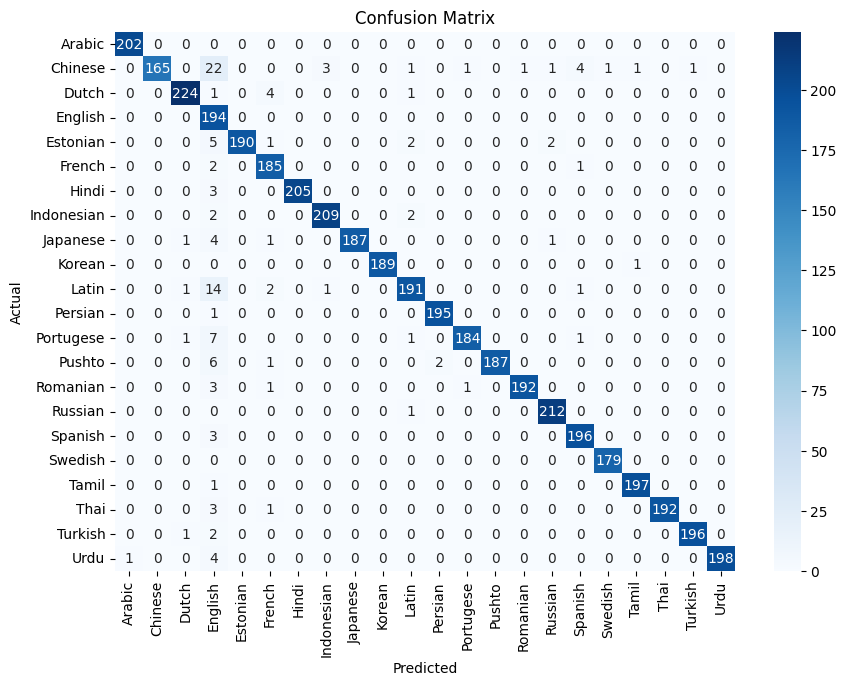

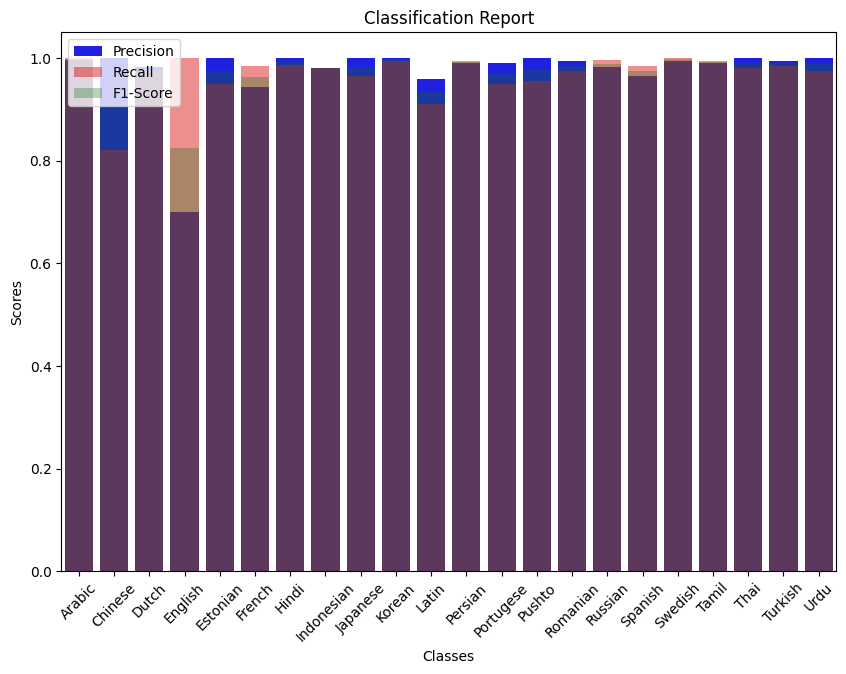

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 7))
sns.barplot(x=report_df.index[:-3], y=report_df['precision'][:-3], color='b', label='Precision')
sns.barplot(x=report_df.index[:-3], y=report_df['recall'][:-3], color='r', alpha=0.5, label='Recall')
sns.barplot(x=report_df.index[:-3], y=report_df['f1-score'][:-3], color='g', alpha=0.3, label='F1-Score')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report')
plt.legend()
plt.xticks(rotation=45)
plt.show()


### **Step 08 Test on sample paragraphs**

In [16]:
# Sample paragraphs in different languages
paragraphs = {
    "English": "Natural language processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language. The goal of NLP is to enable computers to understand, interpret, and respond to human language.",
    "French": "Le traitement du langage naturel (TAL) est un domaine de l'intelligence artificielle qui se concentre sur l'interaction entre les ordinateurs et les humains par le biais du langage naturel. L'objectif du TAL est de permettre aux ordinateurs de comprendre, interpréter et répondre au langage humain.",
    "Urdu": "قدرتی زبان کی پروسیسنگ (این ایل پی) مصنوعی ذہانت کا ایک میدان ہے جو کمپیوٹرز اور انسانوں کے درمیان قدرتی زبان کے ذریعے بات چیت پر توجہ مرکوز کرتا ہے۔ این ایل پی کا مقصد کمپیوٹرز کو انسانی زبان کو سمجھنے، اس پر عمل کرنے اور جواب دینے کے قابل بنانا ہے۔"
}

# Preprocess the paragraphs
X_new = vectorizer.transform(paragraphs.values())

# Make predictions
predictions = model.predict(X_new)

# Display the results
for i, (lang, text) in enumerate(paragraphs.items()):
    print(f"Paragraph in {lang}:")
    print(f"Text: {text}")
    print(f"Predicted Language: {predictions[i]}")
    print()


Paragraph in English:
Text: Natural language processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language. The goal of NLP is to enable computers to understand, interpret, and respond to human language.
Predicted Language: English

Paragraph in French:
Text: Le traitement du langage naturel (TAL) est un domaine de l'intelligence artificielle qui se concentre sur l'interaction entre les ordinateurs et les humains par le biais du langage naturel. L'objectif du TAL est de permettre aux ordinateurs de comprendre, interpréter et répondre au langage humain.
Predicted Language: French

Paragraph in Urdu:
Text: قدرتی زبان کی پروسیسنگ (این ایل پی) مصنوعی ذہانت کا ایک میدان ہے جو کمپیوٹرز اور انسانوں کے درمیان قدرتی زبان کے ذریعے بات چیت پر توجہ مرکوز کرتا ہے۔ این ایل پی کا مقصد کمپیوٹرز کو انسانی زبان کو سمجھنے، اس پر عمل کرنے اور جواب دینے کے قابل بنانا ہے۔
Predicted Language: Urdu

